In [13]:
import h5py
import logomaker
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Input

In [14]:
sat_h5_file = 'ponies_sat/scores.h5'
targets_file = '/home/drk/farm/data/basenji/data/v4/targets_h.txt'

In [15]:
# open scores h5
sat_h5 = h5py.File(sat_h5_file, 'r')

# read targets
targets_df = pd.read_table(targets_file, index_col=0, usecols=['index', 'identifier', 'description']))


## Helpers

In [81]:
def plot_logo(scores, seq_1hot, viz_len=None, ymin=-np.inf, ymax=np.inf):
    if viz_len is not None and viz_len < seq_1hot.shape[0]:
        mid_pos = seq_1hot.shape[0]//2
        viz_start = mid_pos - viz_len//2
        viz_end = viz_start + viz_len
        scores = scores[viz_start:viz_end]
        seq_1hot = seq_1hot[viz_start:viz_end]
    scores = np.clip(scores, ymin, ymax)
    
    fig, axs = plt.subplots(2, 1, figsize=(30,3.5))
    seq_df = pd.DataFrame(seq_1hot*scores, columns=['A','C','G','T'])
    seq_logo = logomaker.Logo(seq_df, ax=axs[0])
    if not np.isinf(ymin):
        seq_logo.ax.set_ylim(bottom=ymin)
    if not np.isinf(ymax):
        seq_logo.ax.set_ylim(top=ymax)
        
    sns.heatmap(scores.T, center=0, cbar=False, ax=axs[1])
    axs[1].set_yticklabels('ACGT')

In [17]:
num_seqs, seq_len, _ = sat_h5['seqs'].shape
num_targets = targets_df.shape[0]

## Choose sequence/target

In [18]:
variant = 'chr11_100739815_T_C_b38'
for li, label in enumerate(sat_h5['label']):
    label = label.decode('UTF-8')
    if label.startswith(variant):
        print(li)

In [49]:
si = 8

In [50]:
cage_mask = np.array([desc.startswith('CAGE') for desc in targets_df.description])
tissue_mask = np.array([desc.find('blood') != -1 for desc in targets_df.description])
targets_df.loc[cage_mask & tissue_mask]

,genome,identifier,file,clip,scale,sum_stat,description
index,,,,,,,
4788,0,CNhs11045,/home/drk/tillage/datasets/human/cage/fantom/C...,384,1,sum,CAGE:cord blood derived cell line:COBL-a untre...
4791,0,CNhs11049,/home/drk/tillage/datasets/human/cage/fantom/C...,384,1,sum,CAGE:cord blood derived cell line:COBL-a 24h i...
4792,0,CNhs11050,/home/drk/tillage/datasets/human/cage/fantom/C...,384,1,sum,CAGE:cord blood derived cell line:COBL-a 24h i...
4805,0,CNhs11675,/home/drk/tillage/datasets/human/cage/fantom/C...,384,1,sum,"CAGE:Whole blood (ribopure), , donation1"
4806,0,CNhs11671,/home/drk/tillage/datasets/human/cage/fantom/C...,384,1,sum,"CAGE:Whole blood (ribopure), , donation2"
4950,0,CNhs11761,/home/drk/tillage/datasets/human/cage/fantom/C...,384,1,sum,"CAGE:blood, adult, pool1"
5067,0,CNhs11949,/home/drk/tillage/datasets/human/cage/fantom/C...,384,1,sum,"CAGE:Whole blood (ribopure), , donation3"
5137,0,CNhs12545,/home/drk/tillage/datasets/human/cage/fantom/C...,384,1,sum,"CAGE:CD133+ stem cells - cord blood derived, p..."


In [59]:
ti = 4765

## Plot

In [60]:
seq_1hot_ref = sat_h5['seqs'][si]
seq_1hot_alt = sat_h5['seqs'][si+1]

scores_ref = sat_h5['sum'][si,...,ti].astype('float32')
scores_alt = sat_h5['sum'][si+1,...,ti].astype('float32')

seq_1hot_ref.shape, scores_ref.shape

((200, 4), (200, 4))

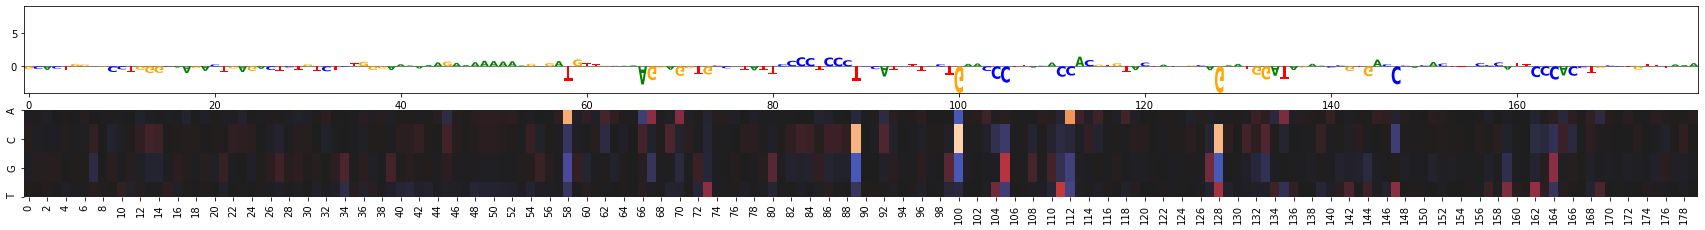

In [84]:
plot_logo(scores_ref, seq_1hot_ref, 160, ymin=-4, ymax=9)

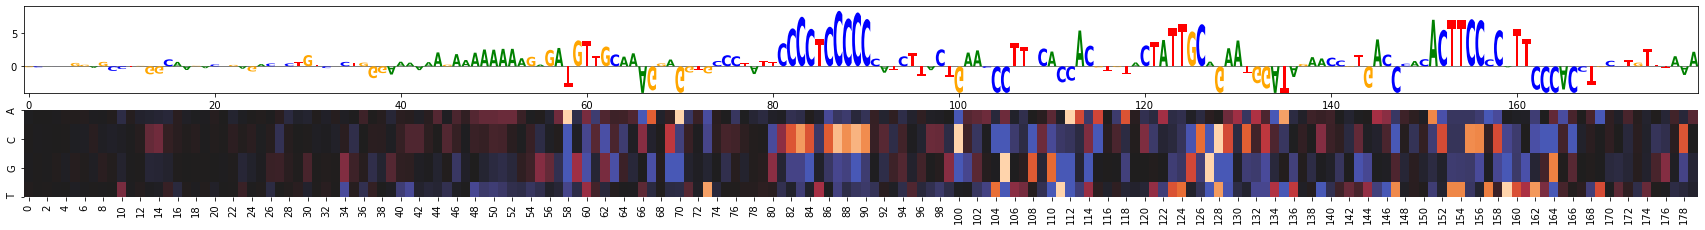

In [85]:
plot_logo(scores_alt, seq_1hot_alt, 160, ymin=-4, ymax=9)